# Angel Barral Diaz

## First we import some modules and the file $aux\_functions.py$ that contains all the subfunctions to generate the cascade and make it evlove

In [1]:
#/bin/usr/python3 

import matplotlib.pyplot as plt
import numpy as np
from aux_functions import*
import scipy.optimize as so

#We define the fitting function
def y(x,sigma,x0,y0):
	y=y0*np.exp(-(x0/sigma)**2*((x-x0)/x0-np.log(x/x0)))
	return y

#We define some parameters

#Critical energy of copper
Ec = 0.020

# Ionization losses [GeV/X0] for Copper (MIP)
dEdx = 0.018

#Histogram parameters
Xmax = 50.
Nprof = 400

# We define a function that creates our cascade, fits it to the curve and gets the desired max distance and the distance to stop 99% of the particles 



In [21]:
def cascade_fit(E0,q0):
    #We create the shower and we evolve it 
    myshower = emShower(E0,q0,0.)
    myshower.develope(Ec,dEdx)

    # Shower summary
    print(""); print("Initial shower particle: ", myshower.shower[0]); print("")
    print(myshower); print("")
    #We get the 1D profile
    shprofile=myshower.profile(Nprof,Xmax)

    #The histogram curve to fit 
    curve=np.histogram(shprofile, bins=np.linspace(0,Xmax,Nprof))


    #Now we fit the curve
    init_guess=[2,10,30]
    fit= so.curve_fit(y, curve[1][1:] , curve[0] , p0=(init_guess) ,absolute_sigma=False,method='trf', \
                      maxfev=10000000)
    ans=fit[0]; cov=fit[1]
    uncer=np.sqrt(np.diag(cov))

    sigma,x0,y0=ans
    Ssigma,Sx0,Sy0=uncer

    #We create spaces to plot our fitted function
    xm=np.linspace(min(curve[1]),max(curve[1]),1000)
    ym=y(xm,sigma,x0,y0)

    #We define a function to get the x for trapping % of electrons

    def distance(cascade, percentage):
        x=cascade[1]
        n_particles=cascade[0]
        tot_particles=sum(n_particles)
        for i in range(len(cascade[0])):
            actual_percentage=sum(n_particles[:i])/tot_particles

            if actual_percentage>=percentage:
                dist=x[i]
                break

        return dist

    dist=distance(curve, 0.99)

    #We write the legend to show the paarameters
    text=" Max position x0 = " + str(sigma)[:5] + "$\pm$" + str(Ssigma)[:5] + "\n" \
           "Distance to 99% = " + str(dist)[:5] 

    #We plot everything

    plt.hist(shprofile, bins=np.linspace(0,Xmax,Nprof), color='darkorange')
    plt.plot(xm,ym, color='dodgerblue', linewidth=2.5, label=text)
    plt.legend(loc="best")
    plt.title("Fit for the cascade at "+str(E0)+"GeV")
    plt.show()


# Now as we have the function ready, we will run it for few energies 


Initial shower particle:  E = 1   q = -1    propagated from X = 0 to 0.647855  [X0]

Shower with 83 particles, 56 charged, total track lenght 40.6244 X0, energy loss 0.731239 GeV



/tmp/ipykernel_36799/4112263796.py:10: RuntimeWarning: invalid value encountered in log
  y=y0*np.exp(-(x0/sigma)**2*((x-x0)/x0-np.log(x/x0)))
/tmp/ipykernel_36799/4112263796.py:10: RuntimeWarning: divide by zero encountered in log
  y=y0*np.exp(-(x0/sigma)**2*((x-x0)/x0-np.log(x/x0)))


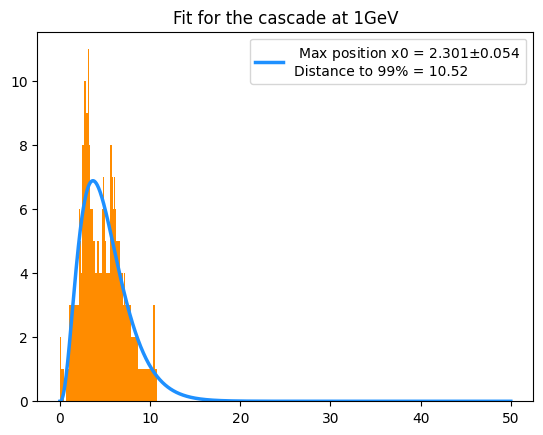

In [22]:
#As expected at low energies we have less penetration and less particles on the cascade
cascade_fit(1,-1)


Initial shower particle:  E = 15   q = -1    propagated from X = 0 to 0.0668649  [X0]

Shower with 1321 particles, 910 charged, total track lenght 629.393 X0, energy loss 11.3291 GeV



/tmp/ipykernel_36799/4112263796.py:10: RuntimeWarning: divide by zero encountered in log
  y=y0*np.exp(-(x0/sigma)**2*((x-x0)/x0-np.log(x/x0)))


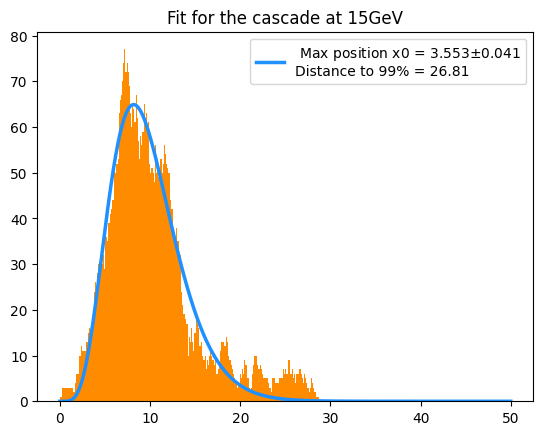

In [23]:
cascade_fit(15,-1)


Initial shower particle:  E = 100   q = -1    propagated from X = 0 to 0.0342212  [X0]

Shower with 8621 particles, 5993 charged, total track lenght 4184.92 X0, energy loss 75.3286 GeV



/tmp/ipykernel_36799/4112263796.py:10: RuntimeWarning: invalid value encountered in log
  y=y0*np.exp(-(x0/sigma)**2*((x-x0)/x0-np.log(x/x0)))
/tmp/ipykernel_36799/4112263796.py:10: RuntimeWarning: divide by zero encountered in log
  y=y0*np.exp(-(x0/sigma)**2*((x-x0)/x0-np.log(x/x0)))


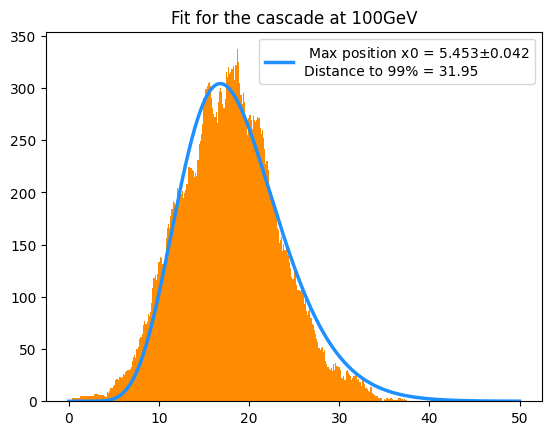

In [24]:
#Now on hight nergies we see the depth has increased exponentialy and also the number of particles generated
cascade_fit(100,-1)